In [5]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import reduce
%matplotlib inline

In [2]:
x=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(x)
type(x)
x[0,2]

#aaa
ls=list(range(0,1));
ls.append(3);
(ls,3)
# x[1,]
    
x[1,list(range(0,2))+[3]]
print(x)
np.cos(x*m.pi/2)

# [print(x) for x in x.__dir__()]

print(x.shape)
print(x.size)
x.transpose().dot(x)
type(x)
x

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
12


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [94]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

In [3]:
# %matplotlib inline
r=1.01;
K=2000.;
params=(r,K);
r,K=params
# print(r)
N0=100;
def Ndot(N,t,params):
    r,K=params
    dN=r*N*(1.0-N/K);
    return dN;
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1)
t_max=20;
num_tsteps=1001
ts=np.linspace(0,t_max,num_tsteps);
Ns=odeint(Ndot,N0,ts,args=(params,))

ax.plot(ts,Ns,'-',label='N(t)')
ax.set_xlabel('time')
ax.set_ylabel('N')
ax.set_title('Population N(t) vs t \n when dN/dt=rN(1-N/K)')
ax.legend();

# fig1.show()
# help(type(fig1))

In [4]:
kf=0.1;
params=[kf,]
print(params)
A0=2.0;
B0=1.0;
C0=0.;
c0=(A0,B0,C0);
def cdot(c,t,params):
        A,B,C=c;
        kf=params[0];
        fd=kf*A*B;
        dA=-fd;
        dB=-fd;
        dC=fd;
        return (dA,dB,dC);
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1);
t_max=200;
num_tsteps=1001;
ts=np.linspace(0,t_max,num_tsteps);
cs=odeint(cdot,c0,ts,args=(params,));
As=cs[:,0];
Bs=cs[:,1];
Cs=cs[:,2];
ax.plot(ts,As,':',label='[A]');
ax.plot(ts,Bs,'--',label='[B]');
ax.plot(ts,Cs,'-',label='[C]');

# ax.set_ylim([0,1.2])
ax.set_title('concentrations over time \n for reaction A+B->C')
ax.legend()
# ax.set_ylim([0,1.2])

[0.1]


(0.1, 0.01)
9.5559899594  predicted to be  10.0
experimentally measured at 40.0 to be 0.2389,actually 0.1000


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in double_scalars


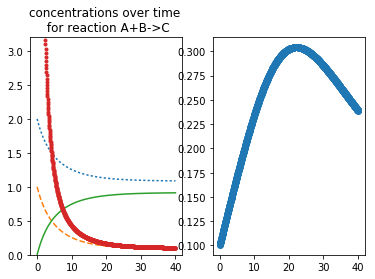

In [89]:
kf=0.1;
kb=0.01;
params=(kf,kb)
print(params)
A0=1.0;
B0=1.0;
AB0=0.;
c0=(A0,B0,AB0);
def cdot(c,t,params):
        A,B,AB=c;
        kf,kb=params;
        fd=kf*A*B;
        bd=kb*AB;
        dA=-fd+bd;
        dB=-fd+bd;
        dAB=fd-bd;
        return (dA,dB,dAB);
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,2,1);
t_max=40;
num_tsteps=1001;
ts=np.linspace(0,t_max,num_tsteps);
cs=odeint(cdot,c0,ts,args=(params,));
As=cs[:,0];
Bs=cs[:,1];
ABs=cs[:,2];
ax.plot(ts,As,':',label='[A]');
ax.plot(ts,Bs,'--',label='[B]');
ax.plot(ts,ABs,'-',label='[C]');

# ax.set_ylim([0,1.2])
ax.set_title('concentrations over time \n for reaction A+B->C')
ax.set_ylim([0,3.2])
# eq=reduce(lambda x,y,z : xy/z,zip(As,Bs,ABs))
eqs=[As[i]*Bs[i]/ABs[i] for i in range(len(As))];
ax.plot(ts,eqs,'.',label='eqs');
print(1/eqs[-1],' predicted to be ',kf/kb);
print('experimentally measured at {:3.1f} to be {:6.4f},actually {:6.4f}'.format(t_max,cs[-1,2]/(t_max*cs[-1,0]*cs[-1,1]),kf))
ax2=plt.subplot(1,2,2);
ax2.plot(ts,[ABs[i]/(ts[i]*As[i]*Bs[i]) for i in range(len(ts))],'o')


(0.1, 0.01, 0.2)
it takes 2.25s for S to decay to 90%
average rate over 30.0s is 0.149 cu/s, predicted by MM to be 0.165


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:74: RuntimeWarning: divide by zero encountered in double_scalars


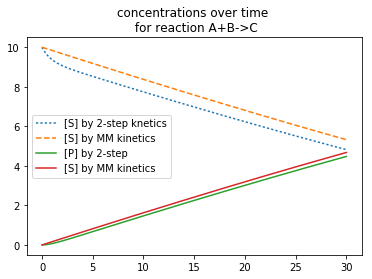

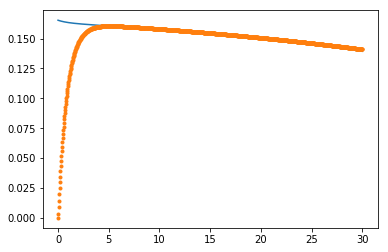

In [150]:
k1=0.1;
kn1=0.01;
k2=0.2;

params=(k1,kn1,k2);
print(params)

E0=1.0;
S0=10.;
ES0=0.;
P0=0.;
# AB0=0.;
c0=(E0,S0,ES0,P0);
def cdot(c,t,params):
        E,S,ES,P=c;
        k1,kn1,k2=params;
        f1=k1*E*S;
        b1=kn1*ES;
        f2=k2*ES;
        
        b2=0.;
        b3=0.;
        f3=0.;
        dE=-f1+b1+f2;
        dS=-f1+b1;
        dES=-(f2-f1)+(b2-b1);
        dP=-(f3-f2)+(b3-b2);
        return (dE,dS,dES,dP);
def cdot_mm(c,t,params):
        E,S,ES,P=c;
        k1,kn1,k2=params;
        Km=(kn1+k2)/k1
        Vmax=k2*E0;
        
        f1=Vmax*S/(Km+S);
        dE=0;
        dS=-f1;
        dES=0;
        dP=f1;
        return (dE,dS,dES,dP);
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1);
t_max=30;
num_tsteps=1001;
ts=np.linspace(0,t_max,num_tsteps);
cs=odeint(cdot,c0,ts,args=(params,));
Es=cs[:,0];
Ss=cs[:,1];
ESs=cs[:,2];
Ps=cs[:,3];

cs_mm=odeint(cdot_mm,c0,ts,args=(params,));
# mmout={}
# mmout['Es']=cs_mm[:,0];
Es_mm=cs_mm[:,0];
Ss_mm=cs_mm[:,1];
ESs_mm=cs_mm[:,2];
Ps_mm=cs_mm[:,3];

ax.plot(ts,Ss,':',label='[S] by 2-step knetics');
ax.plot(ts,Ss_mm,'--',label='[S] by MM kinetics');
# ax.plot(ts,Es,'--',label='[B]');
# ax.plot(ts,ESs,'-',label='[C]');
ax.plot(ts,Ps,'-',label='[P] by 2-step');
ax.plot(ts,Ps_mm,'-',label='[S] by MM kinetics');
ax.legend();


# ax.set_ylim([0,1.2])
ax.set_title('concentrations over time \n for reaction A+B->C')
# ax.set_ylim([0,3.2])
# eq=reduce(lambda x,y,z : xy/z,zip(As,Bs,ABs))
eqs=[As[i]*Bs[i]/ABs[i] for i in range(len(As))];
# ax.plot(ts,eqs,'.',label='eqs');
# print(1/eqs[-1],' predicted to be ',kf/kb);
t,S=next((t,S) for (t,S) in zip(ts,Ss) if (S/S0-0.9)<1E-3 );
print('it takes {:4.2f}s for S to decay to {:2.0f}%'.format(t,S/S0*100))
meanrate=(Ps[-1]-P0)/t_max;
Km=(kn1+k2)/k1
Vmax=k2*E0;
mmrates=[Vmax*Ss[i]/(Km+Ss[i]) for i in range(len(ts))];
actrates=[0];
actrates+=[(Ps[i+1]-Ps[i])/(ts[i+1]-ts[i]) for i in range(len(ts)-1)]
# print(mmrates)
print('average rate over {:3.1f}s is {:5.3f} cu/s, predicted by MM to be {:5.3f}'.format(t_max,meanrate,mmrates[0]))
# print('experimentally measured at {:3.1f} to be {:6.4f},actually {:6.4f}'.format(t_max,cs[-1,2]/(t_max*cs[-1,0]*cs[-1,1]),kf))
# ax2=plt.subplot(2,1,2);
fig2=plt.figure()
ax2=plt.subplot(1,1,1);
ax2.plot(ts,mmrates,'-',label='MM prediction');
ax2.plot(ts,actrates,'.',label='actual rate');
# ax2.plot(ts,[ABs[i]/(ts[i]*As[i]*Bs[i]) for i in range(len(ts))],'o')


In [133]:
help

AttributeError: 'numpy.ndarray' object has no attribute 'diff'